In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd
import seaborn as sns

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
mean = 6.3
variance = mean # It is a Poissont distribution

# Let's aplly the Z function 
value = 15
Z = abs((value - mean))/math.sqrt(variance)
print("The Z value is: ",Z)
pvalue = stats.norm.cdf(-Z)+(1. - stats.norm.cdf(Z))
print("The p value is: ",pvalue)
# As we can see the prbability that we have 15 or more hurricances is too small
#so we can consider it is significative:

The Z value is:  3.4661629670697414
The p value is:  0.0005279431738299246


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

var1 = np.var(pre, ddof =1)
var2 = np.var(post, ddof =1)
sigma = math.sqrt((var1 + var2)/2)
T = abs((np.mean(pre)-np.mean(post))/(sigma*math.sqrt(2/len(pre))))
print("The T value is: ",T)
# Confronting with the t table we find that with 10 samples we are in the t.995 column,
#so it is significative this test because it is less than 0.05

The T value is:  3.786997938137629


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

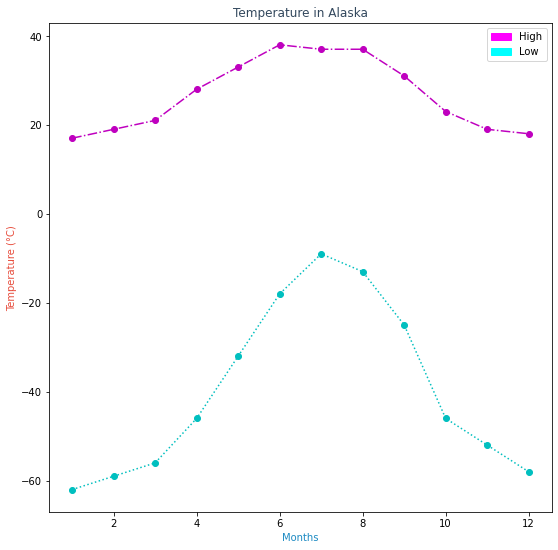

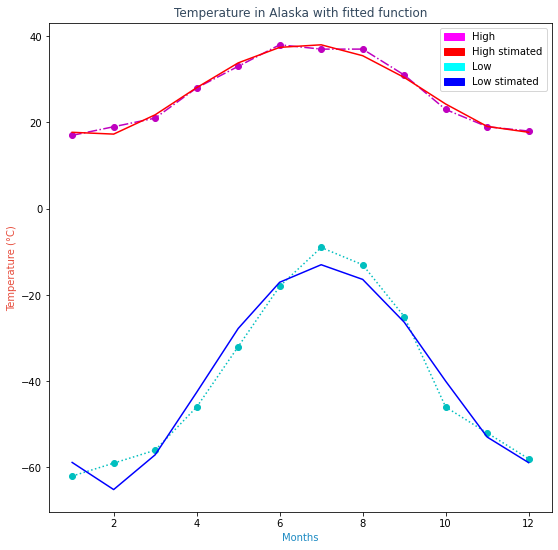

The finded function for the maximum T is:  0.030958624706518445 x^4 +  -0.8247377622419543 x^3 + ...
The finded function for the minimum T is:  0.07393648018446364 x^4 +  -2.0580646205713937 x^3 + ...


In [4]:
high = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
low = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Plotting the temperatures
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])# Months
y = high # average high
z = low # average low
fig = plt.figure(figsize=(9,9))
plt.plot(x,y, 'mo-.', x, z, 'co:')
plt.xlabel('Months', color='#1e8bc3')
plt.ylabel('Temperature (°C)', color='#e74c3c')
plt.title('Temperature in Alaska', color='#34495e')
high_legend = mpatches.Patch(color='magenta', label='High')
low_legend = mpatches.Patch(color='cyan', label='Low')
plt.legend(handles=[high_legend,low_legend])
plt.show()

# Define the function that will try to fit the results
mean_high = np.mean(high)
mean_low = np.mean(low)
def high_finder(x):
    return mean_high
high_finder_vec = np.vectorize(high_finder)

def low_finder(x):
    return mean_low
mean_low_vec = np.vectorize(low_finder)

y_new = high_finder_vec(x)
z_new = mean_low_vec(x)

'''
fig = plt.figure()
plt.plot(x, y, 'm-.', x,y_new, 'r', x, z, 'c:', x, z_new, 'b')
plt.xlabel('Months', color='#1e8bc3')
plt.ylabel('Temperature (°C)', color='#e74c3c')
plt.title('Temperature in Alaska stimation in mean', color='#34495e')
high_legend = mpatches.Patch(color='magenta', label='High')
high_legend_stim = mpatches.Patch(color='red', label='High stimated')
low_legend = mpatches.Patch(color='cyan', label='Low')
low_legend_stim = mpatches.Patch(color='blue', label='Low stimated')
plt.legend(handles=[high_legend, high_legend_stim,low_legend,low_legend_stim])
plt.show()
'''
def func(x, a, b, c, d, e):
    return a*x**4+b*x**3+c*x**2 +d*x + e


popt_high, pcov = curve_fit(func, x, y)
popt_low, pcov = curve_fit(func, x, z)

y_new = func(x, *popt_high)
z_new = func(x, *popt_low)

fig = plt.figure(figsize=(9,9))
plt.plot(x, y, 'mo-.', x,y_new, 'r', x, z, 'co:', x, z_new, 'b')
plt.xlabel('Months', color='#1e8bc3')
plt.ylabel('Temperature (°C)', color='#e74c3c')
plt.title('Temperature in Alaska with fitted function', color='#34495e')
high_legend = mpatches.Patch(color='magenta', label='High')
high_legend_stim = mpatches.Patch(color='red', label='High stimated')
low_legend = mpatches.Patch(color='cyan', label='Low')
low_legend_stim = mpatches.Patch(color='blue', label='Low stimated')
plt.legend(handles=[high_legend, high_legend_stim,low_legend,low_legend_stim])
plt.show()

print("The finded function for the maximum T is: ", popt_high[0], "x^4 + ", popt_high[1], "x^3 + ...")
print("The finded function for the minimum T is: ", popt_low[0], "x^4 + ", popt_low[1], "x^3 + ...")

# As we can see it is good
# The time offset from min to max is not present

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

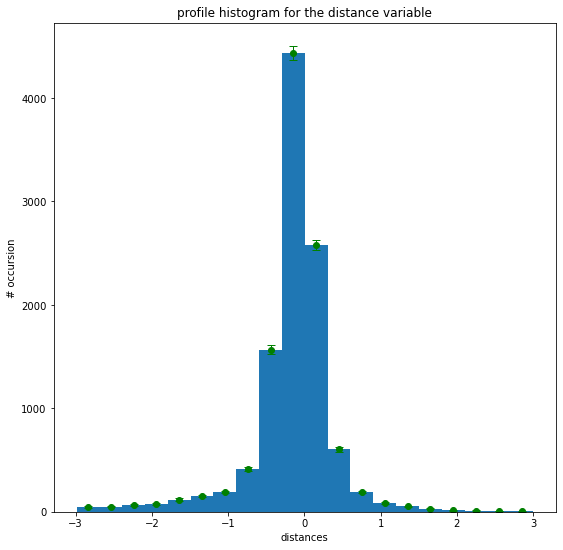

[-2.84025 -2.54075 -2.24125 -1.94175 -1.64225 -1.34275 -1.04325 -0.74375
 -0.44425 -0.14475  0.15475  0.45425  0.75375  1.05325  1.35275  1.65225
  1.95175  2.25125  2.55075  2.85025]
[4.600e+01 5.000e+01 6.700e+01 7.500e+01 1.180e+02 1.510e+02 1.910e+02
 4.140e+02 1.568e+03 4.437e+03 2.577e+03 6.040e+02 1.910e+02 8.700e+01
 5.300e+01 3.100e+01 1.400e+01 1.000e+01 8.000e+00 3.000e+00]


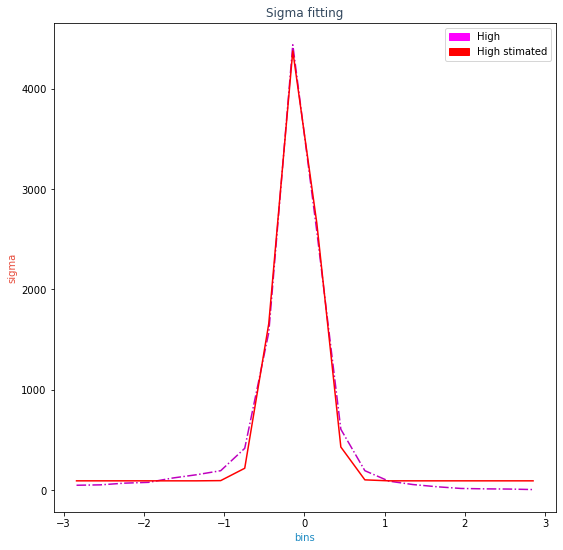

The finded function for the sigma is:  2664.1475742887224 x^12 +  -0.0959678365737738 x^13+ ...
p value :  1.2787768787957668e-178


In [5]:
# Read the pkl file
data = pd.read_pickle('Es10Files/residuals_261.pkl').tolist()
#print(type(data))
# Convert to data Frame
df = pd.DataFrame(data)
#Filter datas
df = df[ abs(df['residuals']) < 3]

# print the Hinstogram
fig = plt.figure(figsize=(9,9))
n, bins, _ = plt.hist(df['residuals'], bins=20, density=False, cumulative=False)
plt.title('profile histogram for the distance variable')
plt.xlabel("distances")
plt.ylabel("# occursion")
# Compute poissont uncertenty
bins_center = lambda i: (bins[i+1]+bins[i])/2
i = np.arange(0,len(bins)-1, 1)
y = n
x = bins_center(i)
sigma = np.sqrt(n)
uncert = sigma
plt.errorbar(x, y, yerr=uncert, fmt='o', c='g', linewidth=1, capsize=4, label= "Poisson uncertainty")
plt.show()


print(x)
print(y)

def func(x, A, offset, sigma, c):
    return c + (A * stats.norm.pdf(x,offset,sigma))
'''
def func(x, a, b, c, d, e, f, g, h, j, k, l, m, n):
    return  a*x**12 + b*x**11 + c*x**10 + d*x**9 + e*x**8 + f*x**7 + g*x**6 + h*x**5 + j*x**4 + k*x**3 + l*x**2 + m*x + n
popt, pcov = curve_fit(func, x, y)
'''
popt, pcov = curve_fit(func, x, y, p0=[100,1,1,1]) # Set p0 starting value otherwise A can't be etimated

y_new = func(x, *popt)

fig = plt.figure(figsize=(9,9))
plt.plot(x, y, 'm-.', x,y_new, 'r')
plt.xlabel('bins', color='#1e8bc3')
plt.ylabel('sigma', color='#e74c3c')
plt.title('Sigma fitting', color='#34495e')
sigma = mpatches.Patch(color='magenta', label='High')
sigma_stim = mpatches.Patch(color='red', label='High stimated')
plt.legend(handles=[sigma, sigma_stim])
plt.show()

print("The finded function for the sigma is: ", popt[0], "x^12 + ", popt[1], "x^13+ ...")

#Perform a goodness-of-fit test
test, p_value = stats.chisquare(y, y_new)
print('p value : ', p_value)
# So we can conclude that it is a good fit beacuse the p value is very small

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

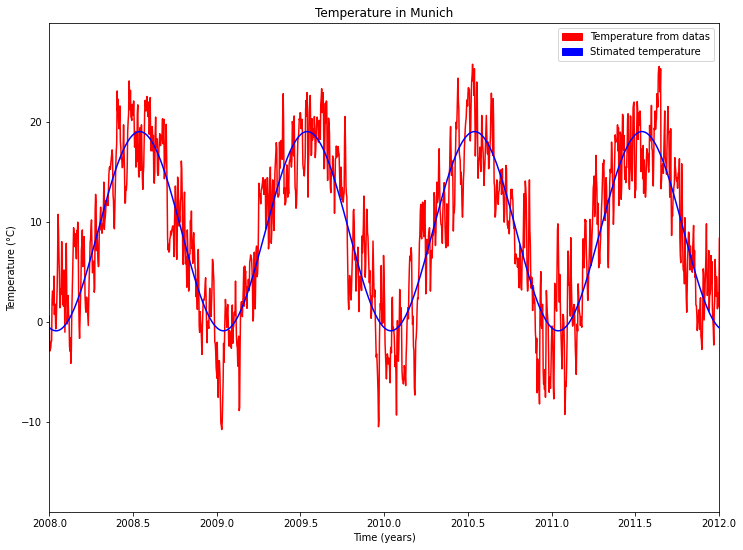

The fitting function cohefficent are: 
 a =  -9.955183582006475 
 b= 12.313405907548399 
 c= 9.040845452179305

 Overall average temp:  8.933222104668388  °C
Overall average stimated temp:  8.933222104680974  °C


Typical daily value predicted by the model for the hottest time:  18.995869657114113 °C
Typical daily value predicted by the model for the coldest time:  -0.9142093872594685 °C


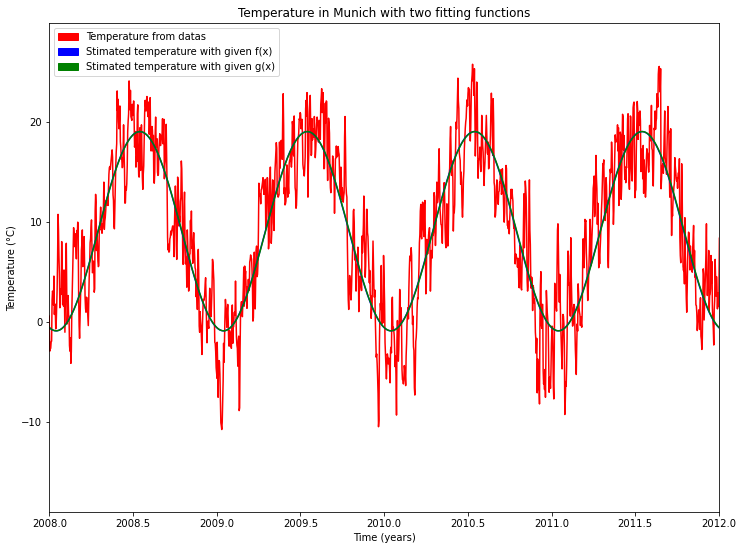

RSS for f(x): 329861.4306511502
R^2 for f(x): 0.22456793031551048


RSS for g(x): 329861.4306511502
R^2 for g(x): 0.22456793031551048


The difference between the R^2 values for the models is 
 0.0


p-value: 1.000 , additional parameter necessary: NO


In [8]:
# Read from the given file
frame = pd.read_csv('Es10Files/munich_temperatures_average_with_bad_data.txt', sep=' ', header=None)
frame.columns = ['Date', 'Temperature'] # Set Date and temperature collumn
df = pd.DataFrame(frame) # Pass to pandas data frame

#remove no sense datas, it's difficult to think in Munich we could have more than 40 degrees,
#also this increase the output visuability
df = df.drop(df[abs(df['Temperature']) > 40].index)

#compute the axis, where t is the time in years as asked
t = df['Date']
y = df['Temperature']

#from the text the f function is:
def f(t, a, b, c):
    f = a*np.cos(2*math.pi*t + b) + c
    return f

#fit the function to the data
poptf, pcovf = curve_fit(f, t, y)

y_new = f(t, *poptf)

#Plot datas and fitted model with the given function
fig = plt.figure(figsize=(12,9))
plt.plot(t, y,'r', t, y_new,'b')
plt.title('Temperature in Munich')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (°C)')
plt.xlim(2008, 2012) #reduce to the intervall [2008, 2012]
# Legend:
temp = mpatches.Patch(color='r', label='Temperature from datas')
temp_stim = mpatches.Patch(color='b', label='Stimated temperature')
plt.legend(handles=[temp, temp_stim])
plt.show()

#The cohefficent of the fitting function finded are:
print("The fitting function cohefficent are: \n a = ", poptf[0], '\n b=', poptf[1], '\n c=', poptf[2] )

#medium temperatures
print('\n Overall average temp: ', np.mean(y), ' °C')
print('Overall average stimated temp: ', np.mean(y_new), ' °C')

#typical daily average values predicted by the model for the coldest and hottest time of year
hottest = np.max(y_new)
coldest = np.min(y_new)

print('\n')
print('Typical daily value predicted by the model for the hottest time: ',hottest,'°C')
print('Typical daily value predicted by the model for the coldest time: ',coldest,'°C')

# b is the phase of the cosine function that fit the datas, wich is a shift of the whole function

#define the given function g
def g(t, a, b, c, d):
    f = a*np.cos(2*math.pi*b*t + c) + d
    return f

#fit the data with the function g
poptg, pcovg = curve_fit(g, t, y)
y_newg = g(t, *poptg)

#Make a plot of the data and the best-fit model
fig2 = plt.figure(figsize=(12,9))
plt.plot(t, y,'r', t, y_new,'b', t, y_newg, 'g')
plt.title('Temperature in Munich with two fitting functions')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (°C)')
plt.xlim(2008, 2012) #reduce to the intervall [2008, 2012]
# Legend
temp = mpatches.Patch(color='r', label='Temperature from datas')
temp_stim = mpatches.Patch(color='b', label='Stimated temperature with given f(x)')
temp_stimg = mpatches.Patch(color='g', label='Stimated temperature with given g(x)')
plt.legend(handles=[temp, temp_stim, temp_stimg])
plt.show()

#Compute the Residual Sum of Squares
rss = np.sum((y_new - np.mean(y))**2)
tss = np.sum((np.mean(y) - y)**2)
r2f = 1-rss/tss
print('RSS for f(x):',rss)
print('R^2 for f(x):',r2f)
print('\n')
rssg = np.sum((y_newg - np.mean(y))**2)
r2g = 1-rss/tss
print('RSS for g(x):',rss)
print('R^2 for g(x):',r2g)

diff =abs(r2f-r2g)
print('\n')
print('The difference between the R^2 values for the models is \n', diff)

#Use the Fisher F-test to determine whether the additional parameter is motivated

# define alpha
alpha = 0.05 #alpha could also be 0.10

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, ntot, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(ntot - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, ntot - ndof_2)
    if verbose:
        print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

print('\n')
pval_f_vs_g = Ftest(rss, rssg, 3, 4, len(t), verbose=True)